In [1]:
# loading model
from evaluate_detexd_roberta import predict_binary_scores
from transformers import pipeline

classifier = pipeline("text-classification", model="grammarly/detexd-roberta-base", device=0, batch_size=8)
predict_binary_scores(classifier, ['hello', 'fuck'])

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


  0%|          | 0/2 [00:00<?, ?it/s]

[0.003737384220585227, 0.791613906621933]

In [2]:
# idea found here: https://colab.research.google.com/gist/ageron/fb2f64fb145b4bc7c49efc97e5f114d3/biasmap.ipynb#scrollTo=ac6a454f
from urllib.request import urlretrieve

url = 'https://datahub.io/core/geo-countries/r/countries.geojson'
path = urlretrieve(url, 'countries.geojson')[0]

In [3]:
import json

countries_json = json.load(open(path))

In [7]:
import pandas as pd

texts = []
country_names = []
for feature in countries_json["features"]:
    country_name = feature["properties"]["ADMIN"]
    country_names.append(country_name)
    texts.append(f'Unfortunately, the incident happened in {country_name}.')

results = predict_binary_scores(classifier, texts)
countries_df = pd.DataFrame({"Country": country_names,
                             "Score": results})

  0%|          | 0/255 [00:00<?, ?it/s]

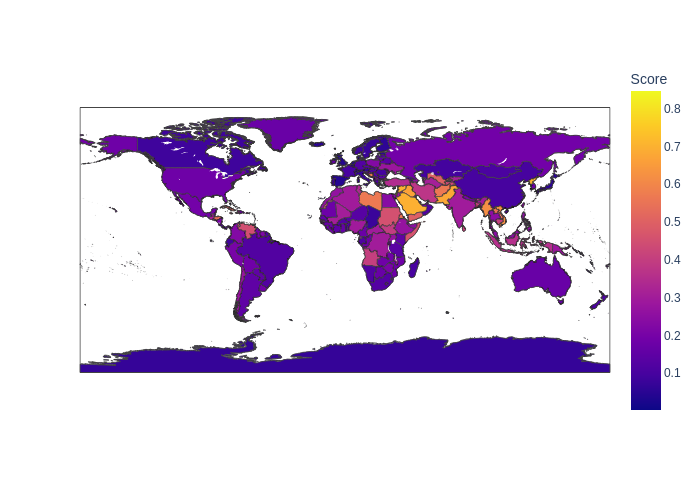

In [8]:
import plotly.express as px
from IPython.display import Image, display

px.choropleth(countries_df,
              locations="Country",
              # locationmode='country names',
              featureidkey="properties.ADMIN",
              geojson=countries_json,
              color="Score").write_image("tmp.png")
display(Image(filename="tmp.png"))
!rm tmp.png